<a href="https://colab.research.google.com/github/Jasmine-kaur8/Loan_Application_Status_Project/blob/main/Loan_Application_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
from google.colab import files
uploaded = files.upload()

Saving loan_prediction(project).csv to loan_prediction(project) (2).csv


Importing the data

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Importing required libraries

In [206]:
data = pd.read_csv('loan_prediction(project).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Reading the data

In [207]:
data.shape

(614, 13)

The data has 615 rows and 13 columns

In [208]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many null values

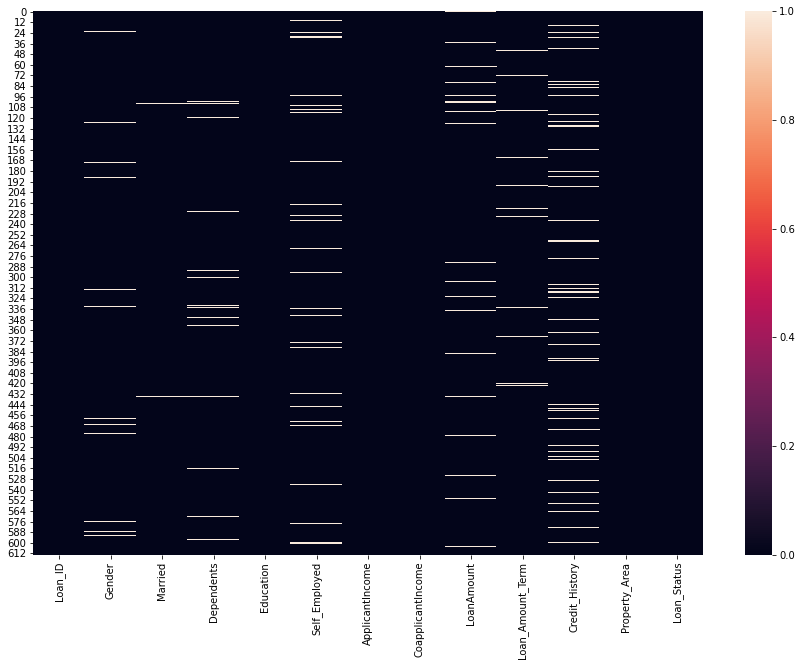

In [209]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

Visual representation of the null values

In [210]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There is high variation andoutliers in applicant income, coapplicant income. 

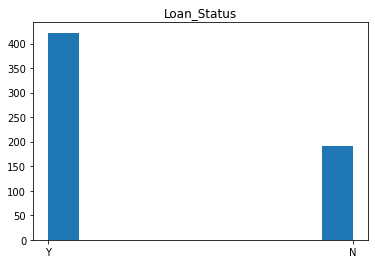

In [211]:
#HISTOGRAM

data['Loan_Status'].hist(grid = False)
plt.title('Loan_Status')
plt.show()

There is class imbalance

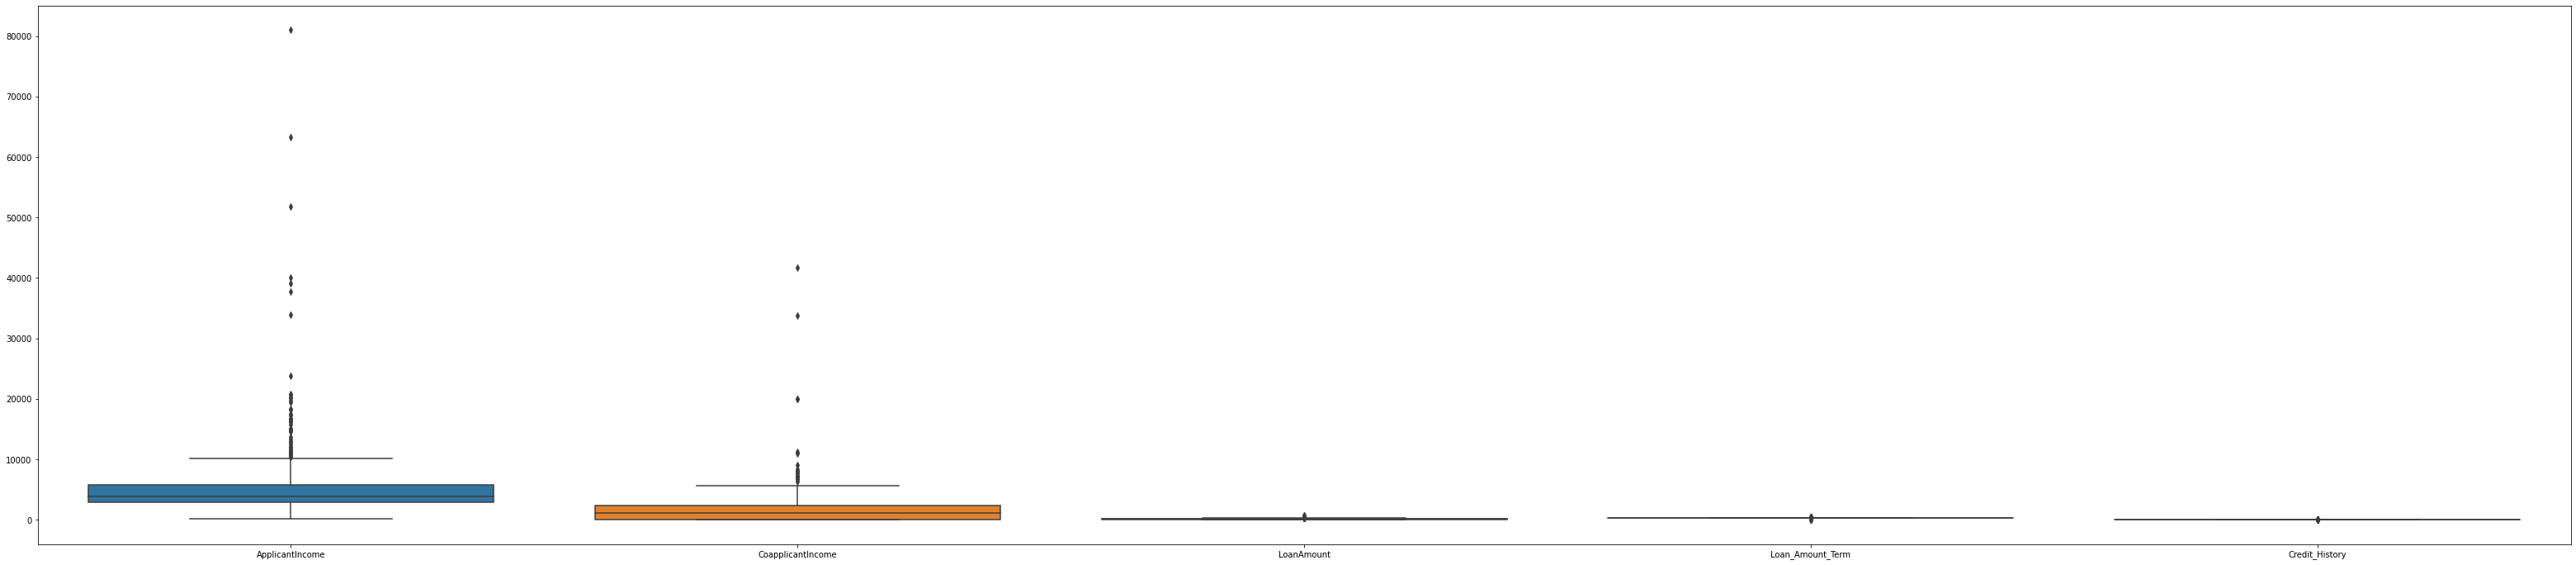

In [212]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

There are outliers in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa220028e90>,
      dtype=object)

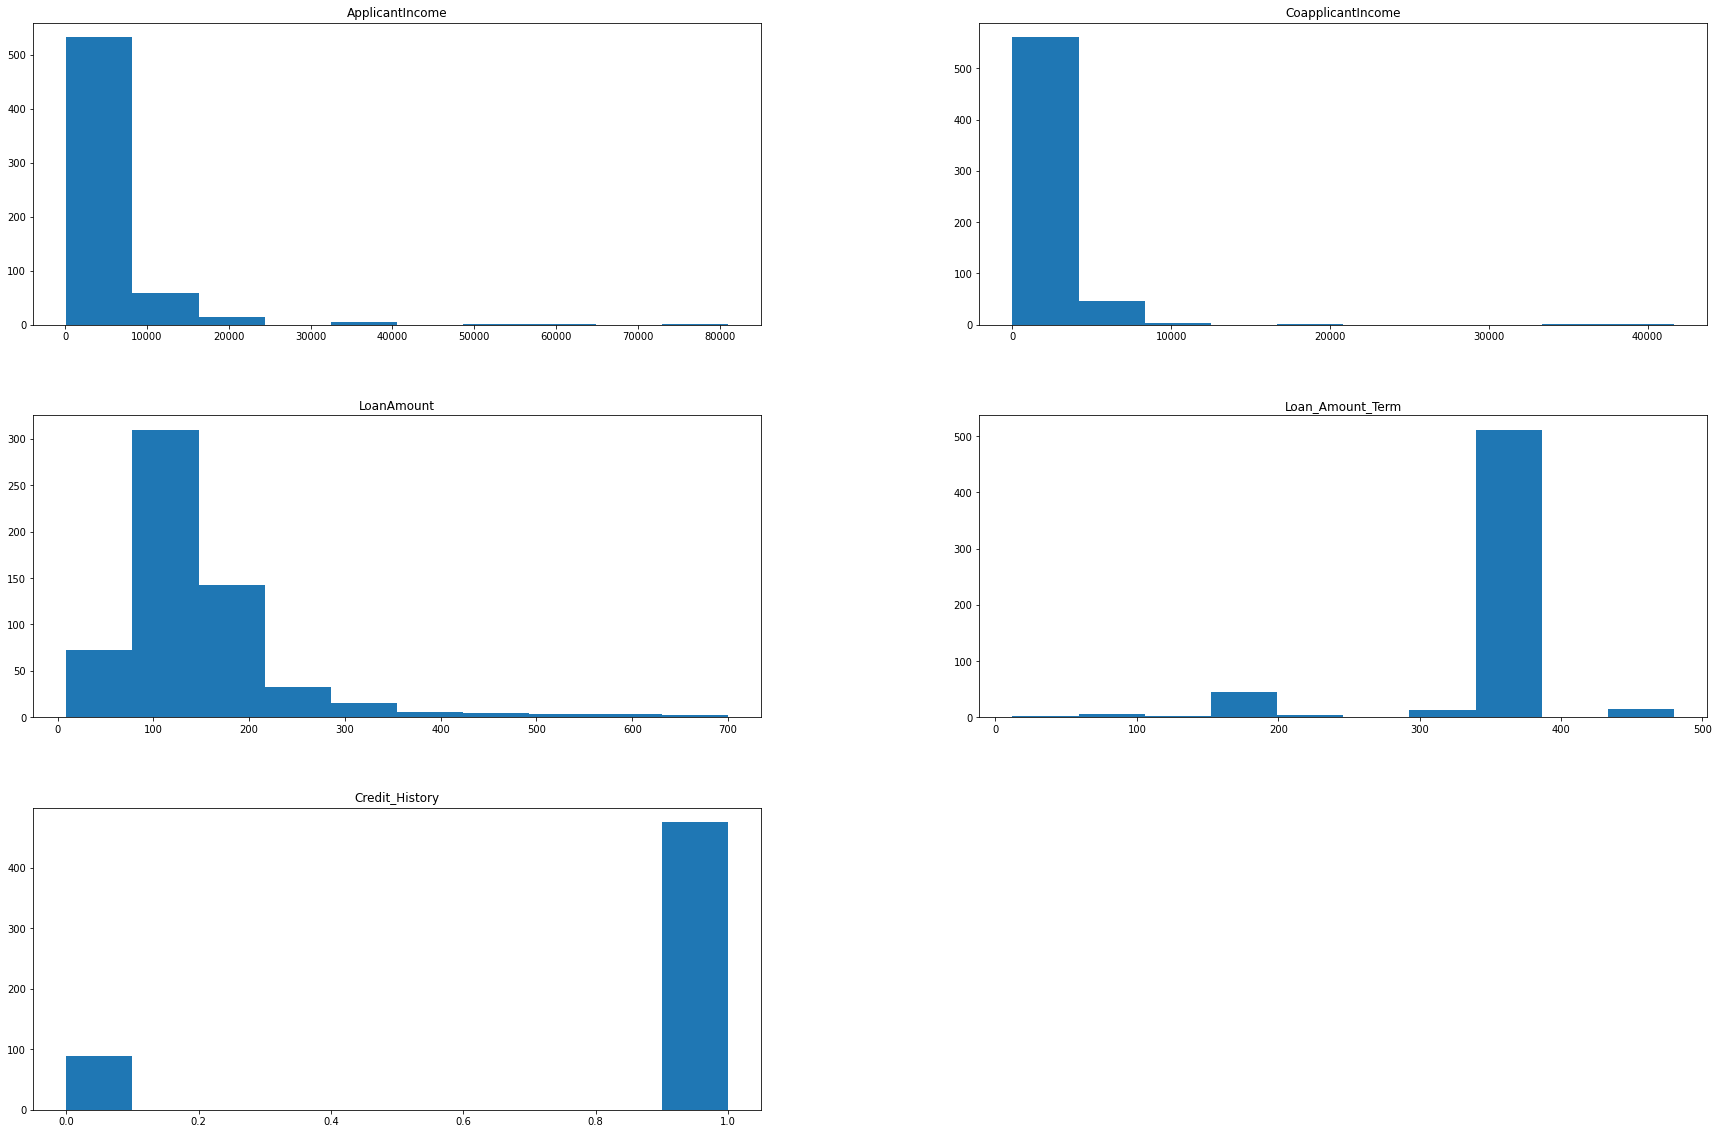

In [213]:
data.hist(figsize = (30,20), grid = False)

There is skewness in the data

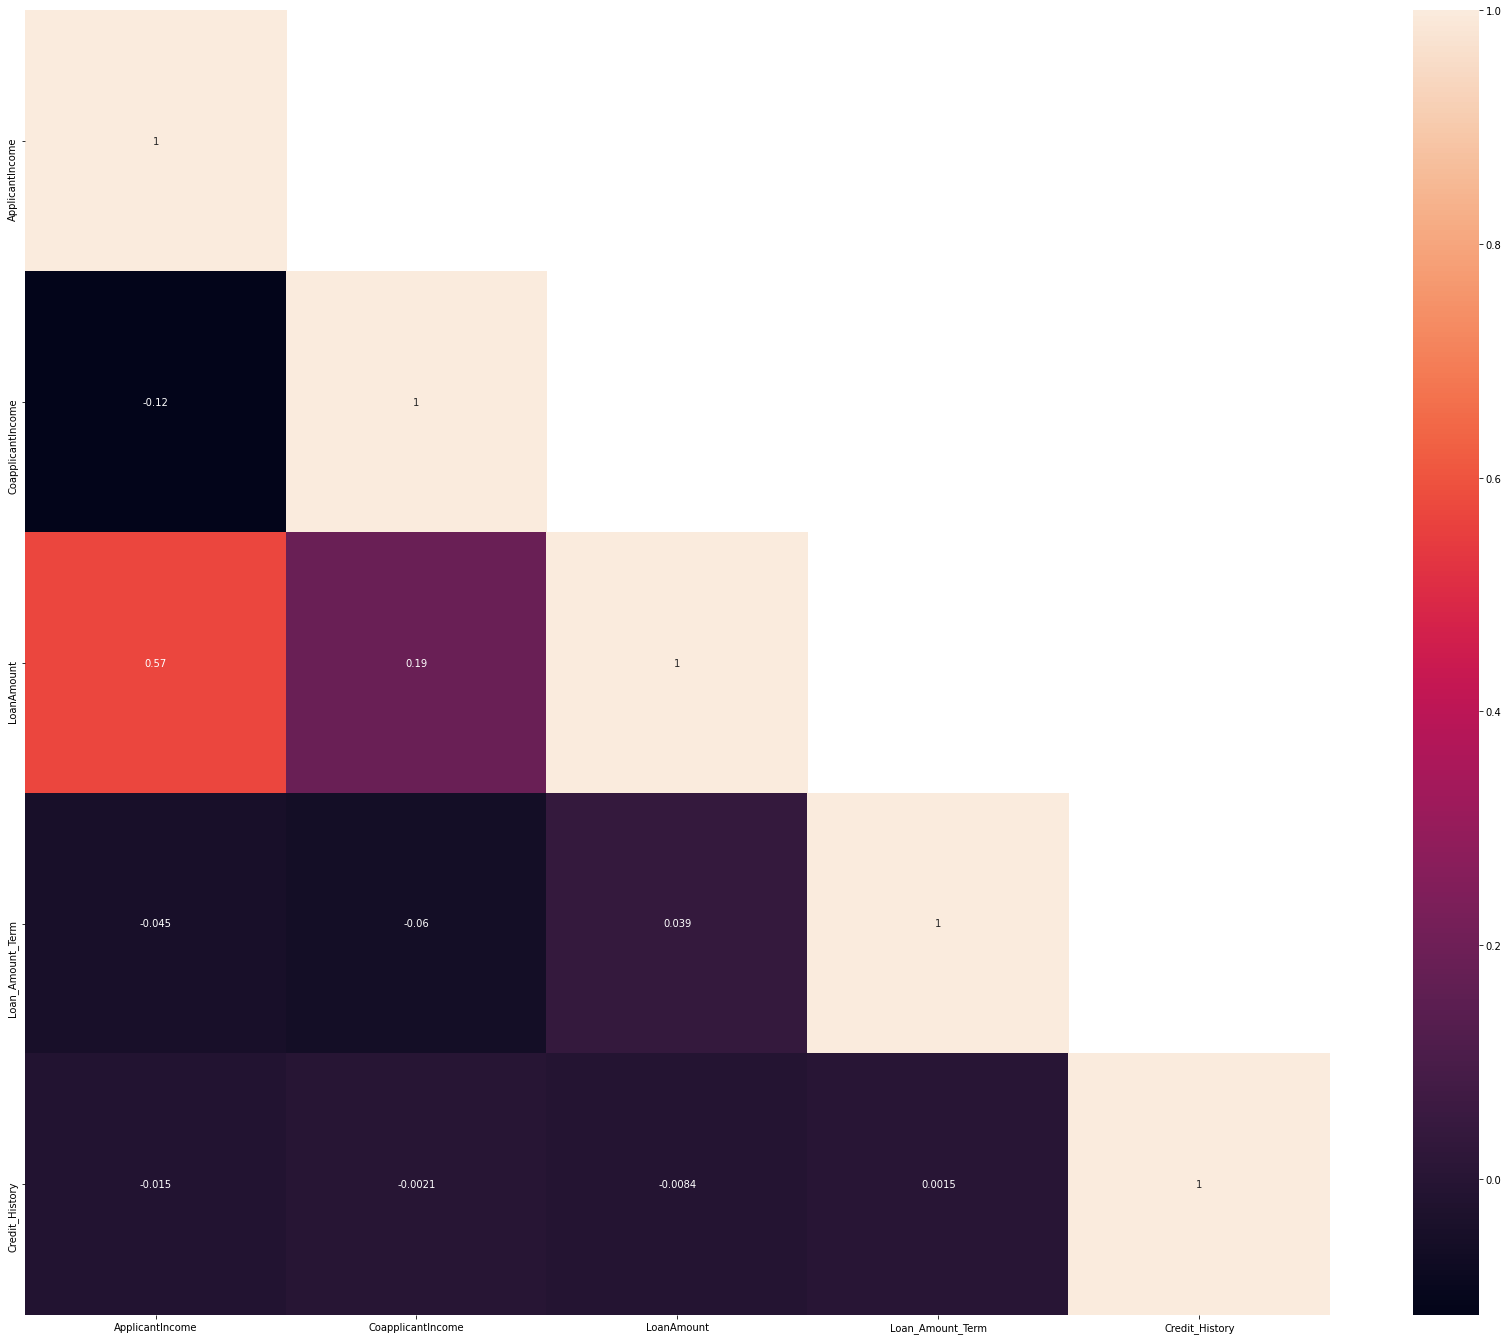

In [214]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

No two features have high correlation

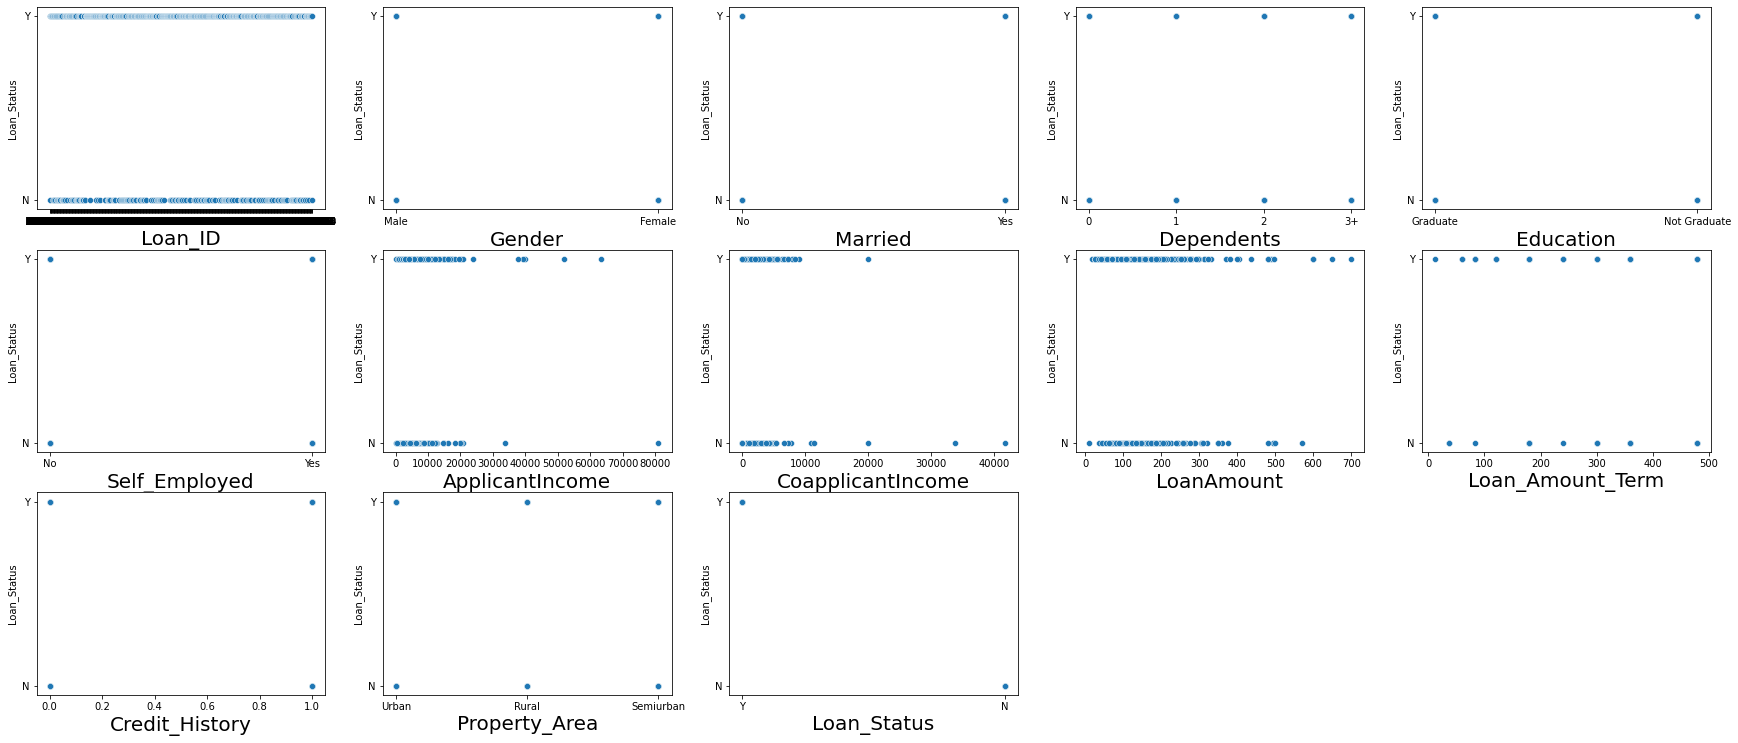

In [215]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'Loan_Status', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The graphs show that there is no prominent difference between label and any of the features

In [216]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

There is high skewness

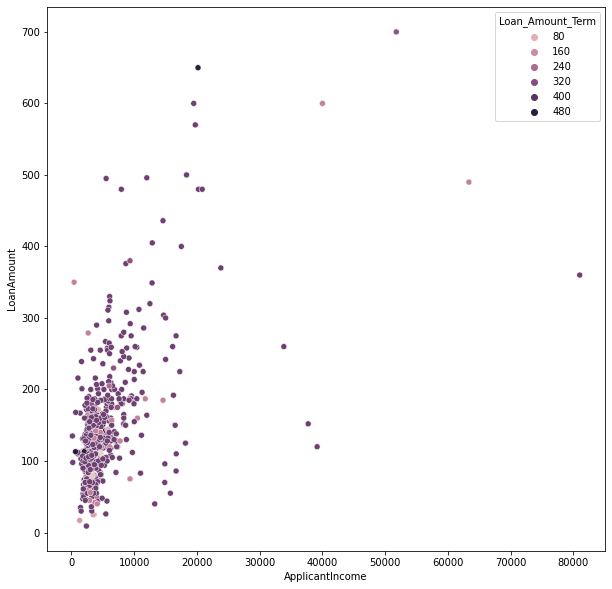

In [217]:
fig,axes=plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Amount_Term',data=data)

Not a strong relationship between loan amount and applicant income

Text(0.5, 1.0, 'count plot for Education and Loan_Status')

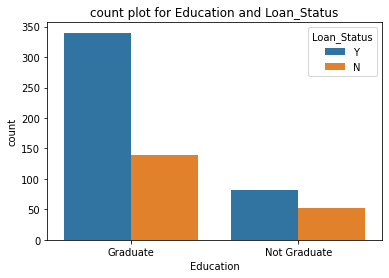

In [218]:
sns.countplot(data['Education'], hue = data['Loan_Status'])
plt.title('count plot for Education and Loan_Status')

Those who are educated are more likely have Y loan status.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


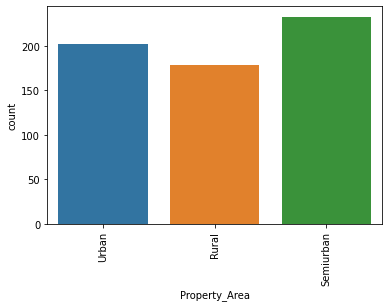

In [219]:
print(data['Property_Area'].value_counts())
sns.countplot(data['Property_Area'])
plt.xticks(rotation = 90);

The highest count if of Semiurban, followed by Urban and then Rural.

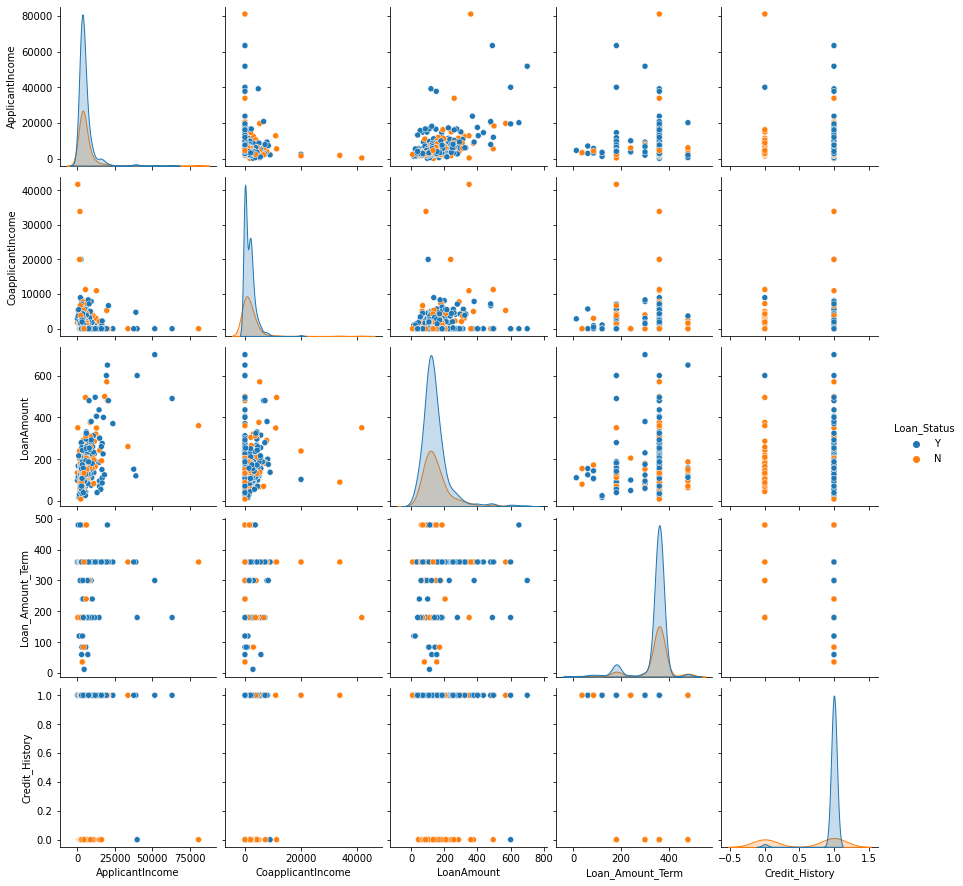

In [220]:
sns.pairplot(data, hue = 'Loan_Status')

The data has high skewness 

In [221]:
#Dealing with null values

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(data[['LoanAmount','Loan_Amount_Term', 'Credit_History']])

data1 = pd.DataFrame(data_filled)

Applied KNNImputer

In [222]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

Dealt with null values of categorical column with mode values of the column

In [223]:
data['LoanAmount'] = data1[0]
data['Loan_Amount_Term'] = data1[1]
data['Credit_History'] = data1[2]
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null value now.

In [224]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (614, 5)
shape after          : (367, 5)
Percentage Loss      : 0.4022801302931596


40% of the data is lost, thus it is not a good idea to apply IQR

In [227]:
df.drop(columns = 'Loan_ID',axis = 1, inplace =True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,104.666667,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Dropped the loan_id and reading the data

In [228]:
from sklearn.preprocessing import LabelEncoder

Applied label encoder

In [229]:
le = LabelEncoder()

Intialized the label encoder

In [230]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])


Substituted the encoded values in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa21f4acf10>,
      dtype=object)

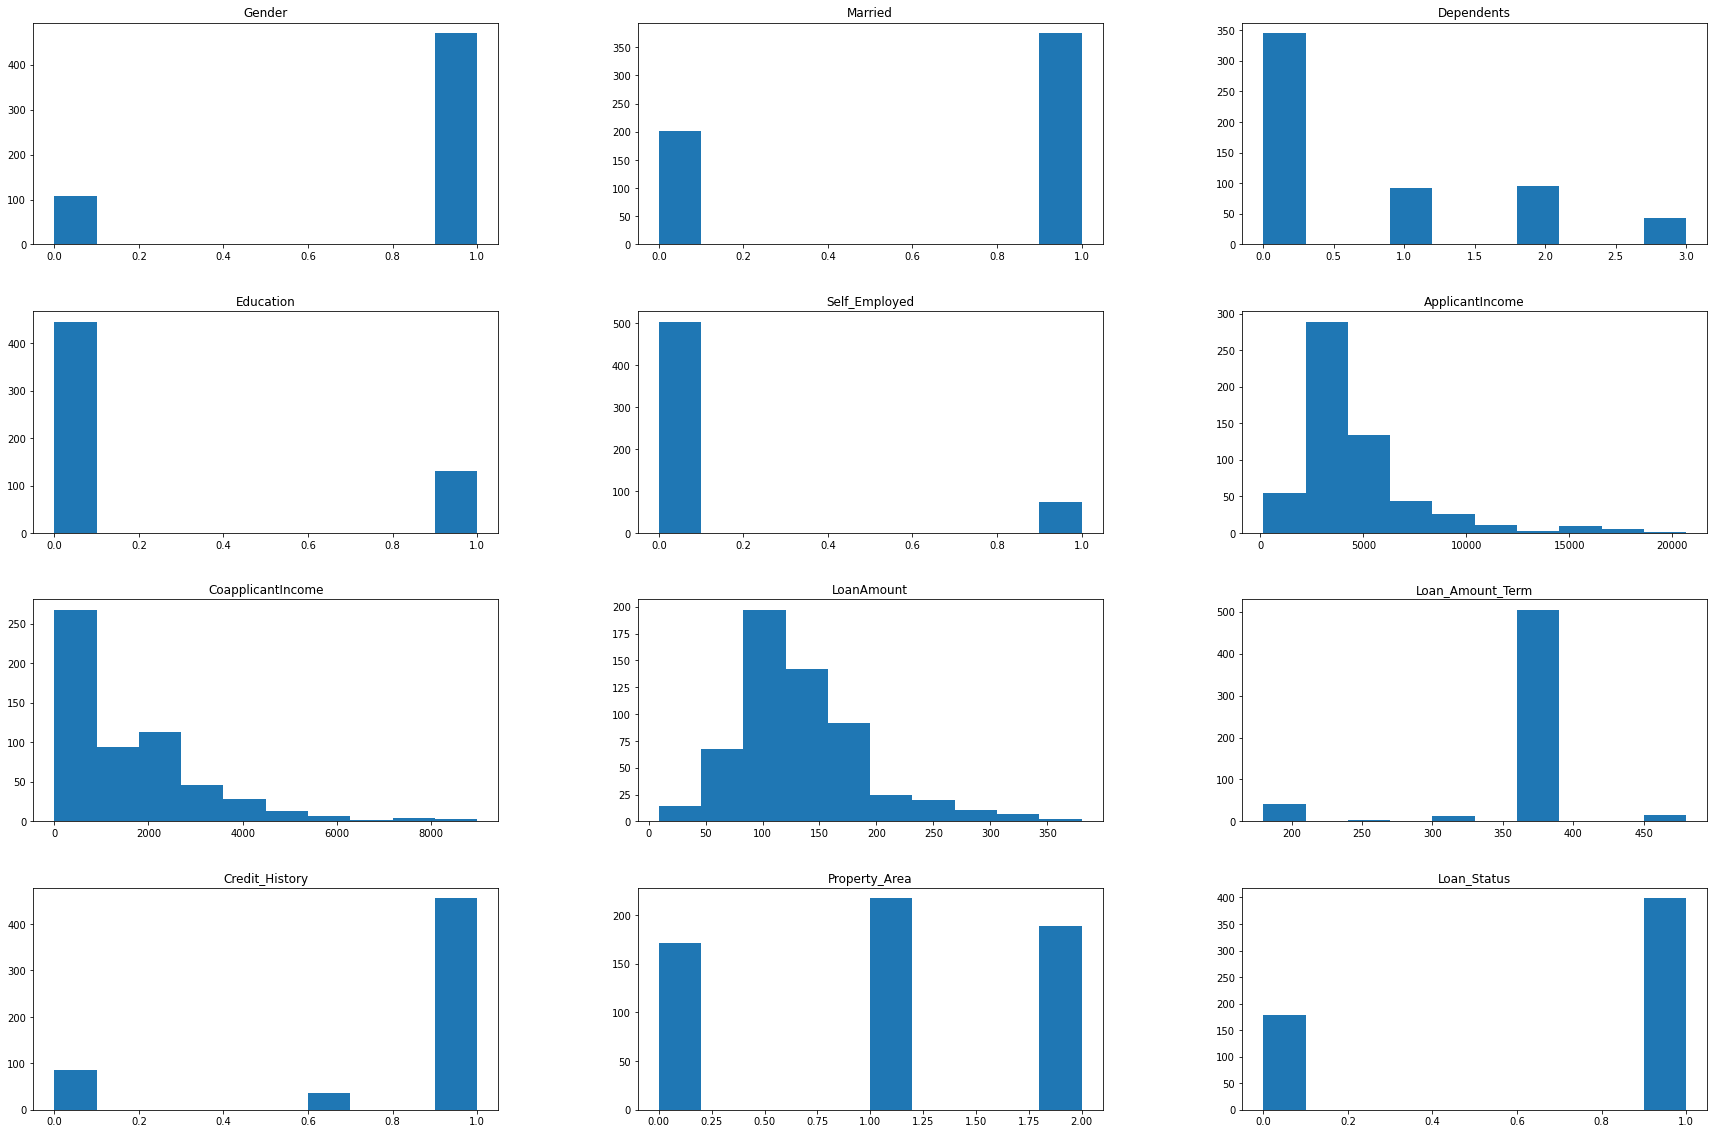

In [231]:
df.hist(figsize = (30,20), grid = False)


Histograms of all the features of the dataset

In [232]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(df))

df1 = df[(z<3).all(axis = 1)]

Applied z score

In [233]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df1.shape[0])/df.shape[0])

shape before and after
shape before         : (577, 12)
shape after          : (505, 12)
Percentage Loss      : 0.12478336221837089


12% data is lost, thus we can apply this.

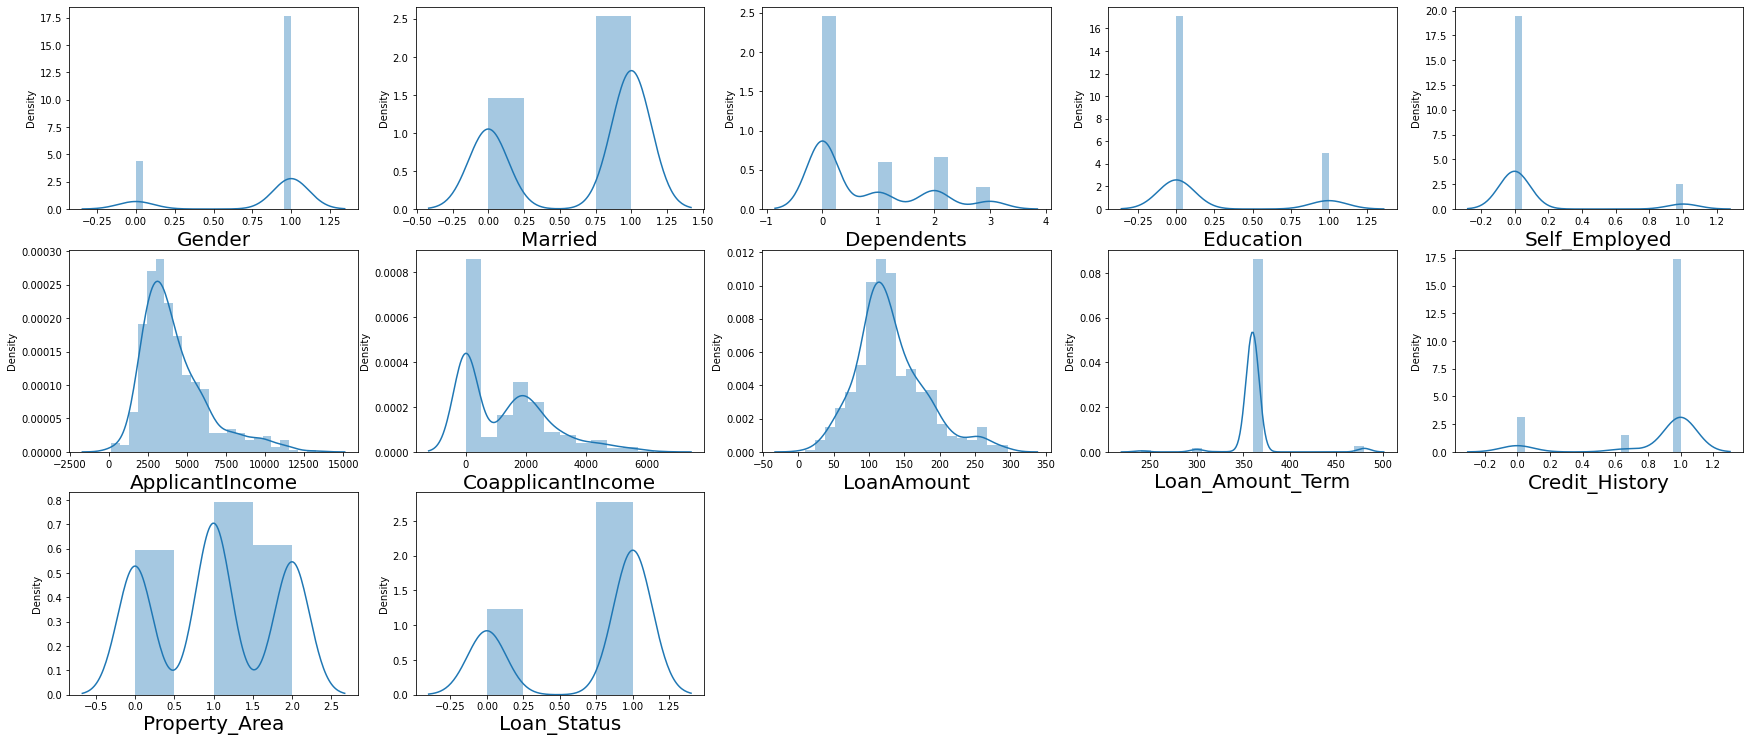

In [234]:
plt.figure(figsize = (30,35))
graph = 1

for column in df1:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.distplot(df1[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The data is less skewed.

In [235]:
#applying standard scaler:

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df1)

Applied standard scaler

In [236]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Gender,1.209968
1,Married,1.392290
2,Dependents,1.182540
3,Education,1.071461
4,Self_Employed,1.045590
5,ApplicantIncome,1.880284
6,CoapplicantIncome,1.580022
7,LoanAmount,1.795181
8,Loan_Amount_Term,1.028285
9,Credit_History,1.479187


VIF is less than 5 for all the features, thus there is no problem of multicollinearity.

In [237]:
Y = df1['Loan_Status']
X = df1.drop(columns = ['Loan_Status'])

Spliting the data into dependent and independent variable.

In [238]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

Applied overfitting.

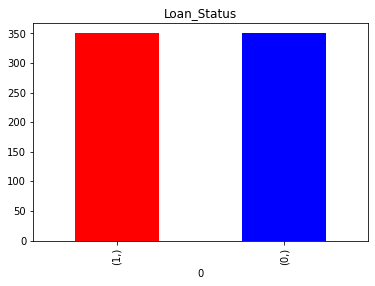

In [239]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='Loan_Status', color=['r','b'])

Now, the data is balanced.

In [240]:
y = pd.Series(Y_over)
y

0      1
1      0
2      1
3      1
4      1
      ..
695    0
696    0
697    0
698    0
699    0
Length: 700, dtype: int64

Converted the data into series.

In [241]:
x = pd.DataFrame(X_over)
x

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.000000,0.000000,0.000000,0.000000,5849.000000,0.000000,104.666667,360.0,1.000000,2.000000
1,1.000000,1.000000,1.000000,0.000000,0.000000,4583.000000,1508.000000,128.000000,360.0,1.000000,0.000000
2,1.000000,1.000000,0.000000,0.000000,1.000000,3000.000000,0.000000,66.000000,360.0,1.000000,2.000000
3,1.000000,1.000000,0.000000,1.000000,0.000000,2583.000000,2358.000000,120.000000,360.0,1.000000,2.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,141.000000,360.0,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
695,1.000000,1.000000,1.947459,0.026271,0.000000,2865.828109,1873.024556,131.579669,360.0,0.000000,1.000000
696,0.178096,0.000000,1.000000,0.821904,0.178096,4621.316295,0.000000,85.452411,360.0,1.000000,0.000000
697,1.000000,1.000000,1.054778,0.000000,0.000000,3434.049588,1552.147928,105.101956,360.0,0.472611,0.000000
698,1.000000,1.000000,0.084948,0.957526,0.000000,3068.605803,1791.632623,122.221310,360.0,0.042474,1.042474


Converted the data into a dataframe.

In [242]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
(pt.fit(x))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

Applied power transformer.

In [243]:
x1 = pd.DataFrame((pt.transform(x)))
x1

,0,1,2,3,4,5,6,7,8,9,10
0,0.554868,-1.293710,-0.866164,-0.623550,-0.414101,0.868081,-1.075254,-0.486063,-0.038701,0.680507,1.280643
1,0.554868,0.827614,0.879162,-0.623550,-0.414101,0.340370,0.826535,0.024434,-0.038701,0.680507,-1.372748
2,0.554868,0.827614,-0.866164,-0.623550,2.460437,-0.522572,-1.075254,-1.462126,-0.038701,0.680507,1.280643
3,0.554868,0.827614,-0.866164,1.691077,-0.414101,-0.811813,0.965844,-0.145496,-0.038701,0.680507,1.280643
4,0.554868,-1.293710,-0.866164,-0.623550,-0.414101,0.924587,-1.075254,0.290731,-0.038701,0.680507,1.280643
...,...,...,...,...,...,...,...,...,...,...,...
695,0.554868,0.827614,1.339252,-0.333197,-0.414101,-0.611837,0.893708,0.098925,-0.038701,-1.756788,0.071363
696,-1.840591,-1.293710,0.879162,1.646633,1.985938,0.357999,-1.075254,-0.946193,-0.038701,0.680507,-1.372748
697,0.554868,0.827614,0.919576,-0.623550,-0.414101,-0.254570,0.835436,-0.476099,-0.038701,-1.319803,-1.372748
698,0.554868,0.827614,-0.567082,1.682600,-0.414101,-0.478184,0.879883,-0.097817,-0.038701,-1.740668,0.126366


Converted into dataframe.

In [244]:
x1.columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
x1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.554868,-1.293710,-0.866164,-0.623550,-0.414101,0.868081,-1.075254,-0.486063,-0.038701,0.680507,1.280643
1,0.554868,0.827614,0.879162,-0.623550,-0.414101,0.340370,0.826535,0.024434,-0.038701,0.680507,-1.372748
2,0.554868,0.827614,-0.866164,-0.623550,2.460437,-0.522572,-1.075254,-1.462126,-0.038701,0.680507,1.280643
3,0.554868,0.827614,-0.866164,1.691077,-0.414101,-0.811813,0.965844,-0.145496,-0.038701,0.680507,1.280643
4,0.554868,-1.293710,-0.866164,-0.623550,-0.414101,0.924587,-1.075254,0.290731,-0.038701,0.680507,1.280643


Renamed the column names.

In [245]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Initialized the classifiers.

In [246]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.76
Precision: 0.7525773195876289
Recall: 0.8021978021978022
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        84
           1       0.75      0.80      0.78        91

    accuracy                           0.76       175
   macro avg       0.76      0.76      0.76       175
weighted avg       0.76      0.76      0.76       175



Classification report of knn.

In [247]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8457142857142858
Precision: 0.8478260869565217
Recall: 0.8571428571428571
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        84
           1       0.85      0.86      0.85        91

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



Classification report of rf.

In [248]:
#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7828571428571428
Precision: 0.8045977011494253
Recall: 0.7692307692307693
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        84
           1       0.80      0.77      0.79        91

    accuracy                           0.78       175
   macro avg       0.78      0.78      0.78       175
weighted avg       0.78      0.78      0.78       175



Classification report of dtc.

In [249]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8171428571428572
Precision: 0.7920792079207921
Recall: 0.8791208791208791
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        84
           1       0.79      0.88      0.83        91

    accuracy                           0.82       175
   macro avg       0.82      0.81      0.82       175
weighted avg       0.82      0.82      0.82       175



Classification report of gb.

In [250]:
#Model Building

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.782857
1,RandomForestClassifier,0.845714
2,DecisionTree,0.834286
3,GradientBoostingClassifier,0.874286


Trained the model and received accuracy score for each of the model.

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

Imported the libraries.

In [252]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

knn = KNeighborsClassifier()
knn.fit(X1_train,y1_train)

y1_pred = knn.predict(X1_test)
conf_mat1 = confusion_matrix(y1_test,y1_pred)
conf_mat1

array([[62, 22],
       [20, 71]])

Confusion matrix of knn

In [253]:
true_positive1 = conf_mat1[0][0]
false_positive1 = conf_mat1[0][1]
false_negative1= conf_mat1[1][0]
false_negative1 = conf_mat1[1][1]

auc1 = roc_auc_score(y1_test,y1_pred)
auc1

0.7591575091575092

auc score of knn

In [254]:
fpr1, tpr1, threshholds1 = roc_curve(y1_test, y1_pred)

roc curve of knn

In [255]:
fpr1

array([0.        , 0.26190476, 1.        ])

fpr of knn

In [256]:
tpr1

array([0.        , 0.78021978, 1.        ])

tpr of knn

In [257]:
threshholds1

array([2, 1, 0])

threshhold of knn

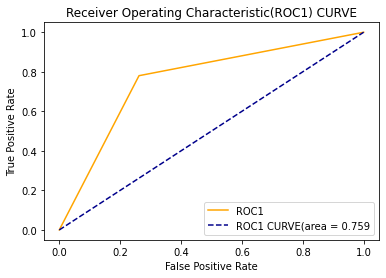

In [258]:
plt.plot(fpr1, tpr1, color = 'orange', label = 'ROC1')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC1 CURVE(area = %0.3f'%auc1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC1) CURVE')

plt.legend()

plt.show()

roc curve of knn

In [259]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)

y2_pred = rf.predict(X2_test)
conf_mat2 = confusion_matrix(y2_test,y2_pred)
conf_mat2

array([[68, 16],
       [12, 79]])

confusion matrix of rf.

In [260]:
true_positive2 = conf_mat2[0][0]
false_positive2 = conf_mat2[0][1]
false_negative2 = conf_mat2[1][0]
false_negative2 = conf_mat2[1][1]

auc2 = roc_auc_score(y2_test,y2_pred)
auc2

0.8388278388278388

auc score of rf.

In [261]:
fpr2, tpr2, threshholds2 = roc_curve(y2_test, y2_pred)

initialized the roc curve of rf.

In [262]:
fpr2

array([0.        , 0.19047619, 1.        ])

fpr of rf.

In [263]:
tpr2

array([0.        , 0.86813187, 1.        ])

tpr of rf.

In [264]:
threshholds2

array([2, 1, 0])

threshholds of rf.

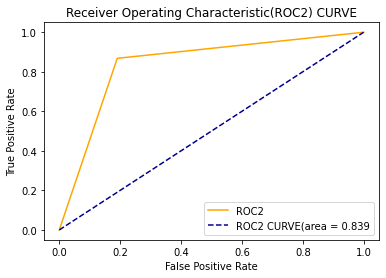

In [265]:
plt.plot(fpr2, tpr2, color = 'orange', label = 'ROC2')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC2 CURVE(area = %0.3f'%auc2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC2) CURVE')

plt.legend()

plt.show()

roc curve of rf.

In [266]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

dtc = DecisionTreeClassifier()
dtc.fit(X3_train,y3_train)

y3_pred = dtc.predict(X3_test)
conf_mat3 = confusion_matrix(y3_test,y3_pred)
conf_mat3

array([[66, 18],
       [26, 65]])

confusion matrix of dtc.

In [267]:
true_positive3 = conf_mat3[0][0]
false_positive3 = conf_mat3[0][1]
false_negative3 = conf_mat3[1][0]
false_negative3 = conf_mat3[1][1]

auc3 = roc_auc_score(y3_test,y3_pred)
auc3

0.7500000000000001

auc of dtc.

In [268]:
fpr3, tpr3, threshholds3 = roc_curve(y3_test, y3_pred)

Initialized of roc curve.

In [269]:
fpr3

array([0.        , 0.21428571, 1.        ])

fpr of dtc

In [270]:
tpr3

array([0.        , 0.71428571, 1.        ])

tpr of dtc.

In [271]:
threshholds3

array([2, 1, 0])

thrshhold of dtc.

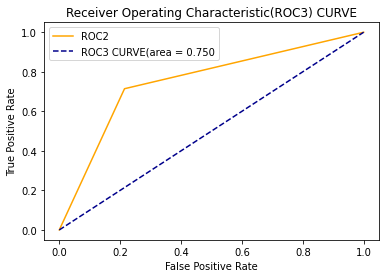

In [272]:
plt.plot(fpr3, tpr3, color = 'orange', label = 'ROC2')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC3 CURVE(area = %0.3f'%auc3)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC3) CURVE')

plt.legend()

plt.show()

roc curve of dtc.

In [273]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

gb = GradientBoostingClassifier()
gb.fit(X4_train,y4_train)

y4_pred = gb.predict(X4_test)
conf_mat4 = confusion_matrix(y4_test,y4_pred)
conf_mat4

array([[64, 20],
       [11, 80]])

confusion matrix of gb.

In [274]:
true_positive4 = conf_mat4[0][0]
false_positive4 = conf_mat4[0][1]
false_negative4 = conf_mat4[1][0]
false_negative4 = conf_mat4[1][1]

auc4 = roc_auc_score(y4_test,y4_pred)
auc4

0.8205128205128204

auc score of gb.

In [275]:
fpr4, tpr4, threshholds4 = roc_curve(y4_test, y4_pred)

Initialized the roc_curve.

In [276]:
fpr4

array([0.        , 0.23809524, 1.        ])

fpr of gb.

In [277]:
tpr4

array([0.        , 0.87912088, 1.        ])

tpr of gb.

In [278]:
threshholds4

array([2, 1, 0])

threshhold of gb.

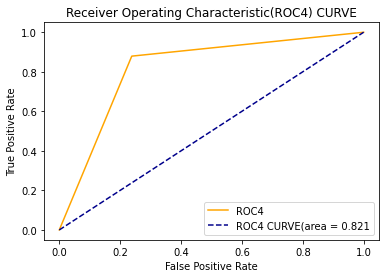

In [279]:
plt.plot(fpr4, tpr4, color = 'orange', label = 'ROC4')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC4 CURVE(area = %0.3f'%auc4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC4) CURVE')

plt.legend()

plt.show()

roc curve of gb.

In [280]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x1, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.761429
1,RandomForestClassifier,0.840000
2,DecisionTree,0.791429
3,GradientBoostingClassifier,0.821429


Cross validation scores of each algorithm.

In [281]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.782857,0.761429,0.021429
1,RandomForestClassifier,0.845714,0.840000,0.005714
2,DecisionTree,0.834286,0.791429,0.042857
3,GradientBoostingClassifier,0.874286,0.821429,0.052857


Random Forest Classifier has the least difference.

In [282]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators' : [100,150,200],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : range(1,5)
}

Applied hyperparameter tuning.

In [283]:
grid = GridSearchCV(RandomForestClassifier(), param_grid = grid_param)

Applied grid search cv.

In [285]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

Trained the model.

In [286]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 150}


Got the best parameters.

In [287]:
#FINAL MODEL
#Substituting the best parameters in the RandomForestClassifier:

RFC = RandomForestClassifier(criterion = 'entropy', max_depth = 8, min_samples_split = 4, n_estimators = 150)

RFC.fit(X_train, y_train)
RFC.score(X_test,y_test)

0.8685714285714285

Received the score 86.85% after substituting the best parameters.

In [288]:
#SAVING THE MODEL:

import joblib
joblib.dump(RFC, 'Loan_application_final_model.pkl')

['Loan_application_final_model.pkl']

Saved the model!